In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import bm3d

from skimage import io
from scipy import ndimage as nd
from skimage.restoration import denoise_tv_chambolle,denoise_wavelet
from skimage.metrics import peak_signal_noise_ratio
from PIL import Image, ImageFilter
from skimage.restoration import denoise_tv_chambolle,denoise_wavelet,denoise_nl_means,estimate_sigma
import warnings
warnings.simplefilter('ignore')

(512, 512, 3)
(512, 512, 3)


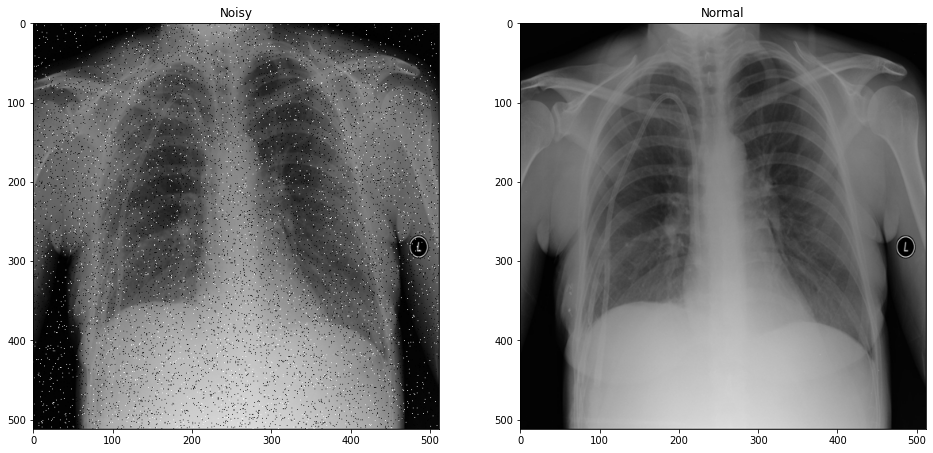

In [4]:
noisy_img = plt.imread("/content/drive/MyDrive/Salt And Pepper/Salt_and_Pepper/SPN_1.png")
normal_img = plt.imread("/content/drive/MyDrive/Salt And Pepper/Normal/Normal-1.png")
print(noisy_img.shape)
print(normal_img.shape)
plt.figure(figsize=(16,9))
plt.subplot(121), plt.imshow(noisy_img, cmap='gray'),plt.title('Noisy')
plt.subplot(122), plt.imshow(normal_img, cmap='gray'), plt.title('Normal')
plt.show()

# BM3D

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


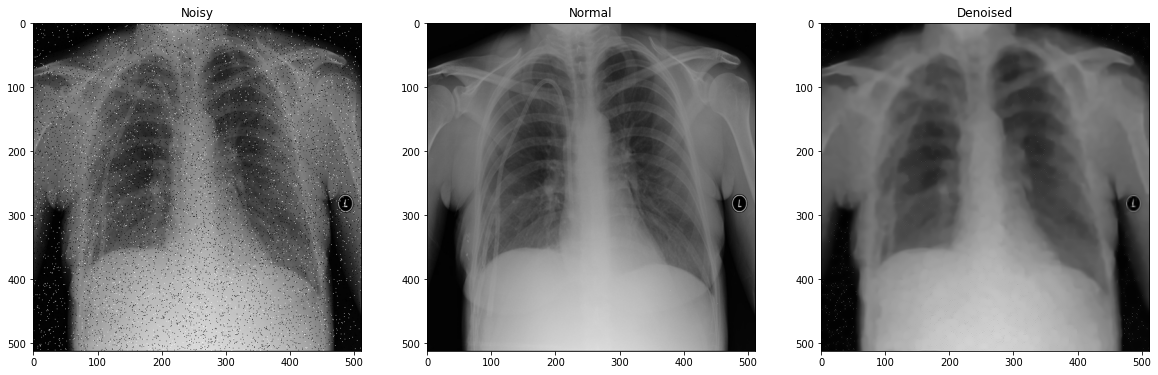

In [5]:
import bm3d
denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.ALL_STAGES)

plt.figure(figsize=(20,11))
plt.subplot(131), plt.imshow(noisy_img, cmap='gray'),plt.title('Noisy')
plt.subplot(132), plt.imshow(normal_img, cmap='gray'), plt.title('Normal')
plt.subplot(133), plt.imshow(denoised_image, cmap='gray'), plt.title('Denoised')
plt.show()

In [6]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoised_image)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  19.370821652652314
PSNR of cleaned image =  32.78699105564798


# Gaussian Filter

(<matplotlib.axes._subplots.AxesSubplot at 0x7f903c9b0990>,
 Text(0.5, 1.0, 'Denoised'))

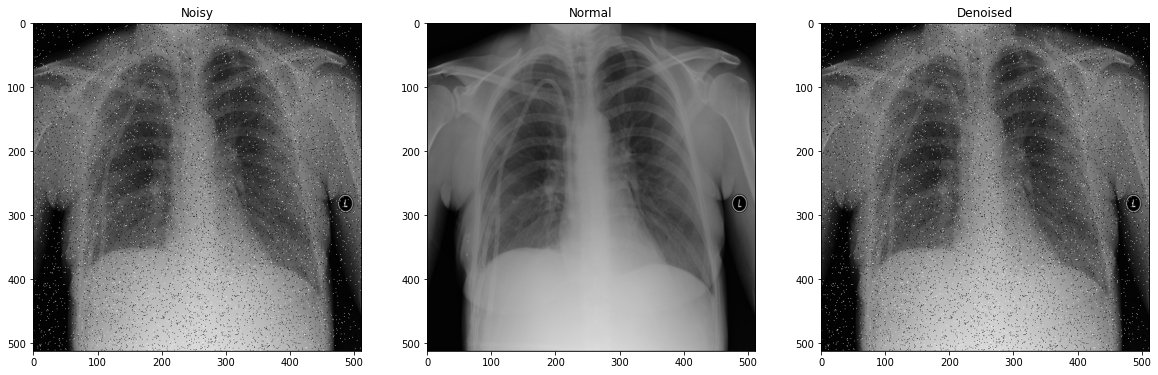

In [7]:
denoise_img_gaussian = nd.gaussian_filter(noisy_img,sigma=0.15)
plt.figure(figsize=(20,11))
plt.subplot(131), plt.imshow(noisy_img, cmap='gray'),plt.title('Noisy')
plt.subplot(132), plt.imshow(normal_img, cmap='gray'), plt.title('Normal')
plt.subplot(133), plt.imshow(denoise_img_gaussian, cmap='gray'), plt.title('Denoised')

In [8]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoise_img_gaussian)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  19.370821652652314
PSNR of cleaned image =  19.370821652652314


# Wavelet

(<matplotlib.axes._subplots.AxesSubplot at 0x7f903c872510>,
 Text(0.5, 1.0, 'Denoised'))

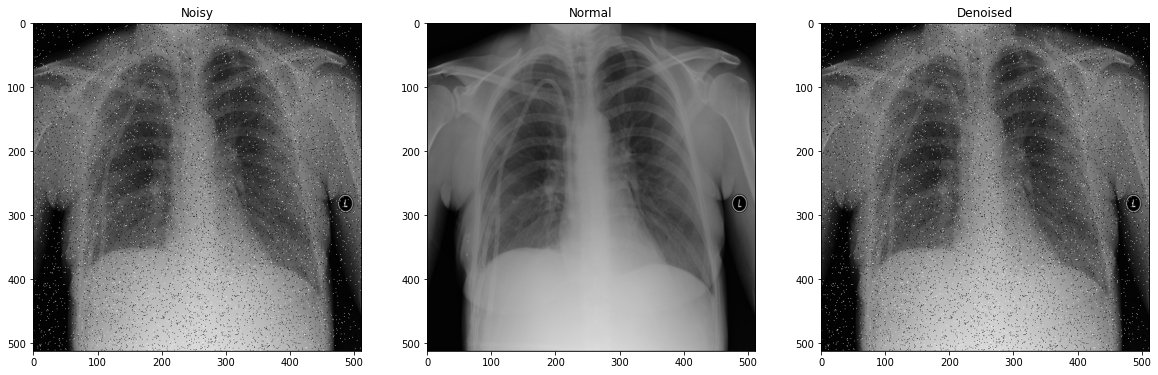

In [9]:
denoise_img_wavelet = denoise_wavelet(noisy_img,multichannel=False,method='BayesShrink',
                                      mode='soft',rescale_sigma=True)

plt.figure(figsize=(20,11))
plt.subplot(131), plt.imshow(noisy_img, cmap='gray'),plt.title('Noisy')
plt.subplot(132), plt.imshow(normal_img, cmap='gray'), plt.title('Normal')
plt.subplot(133), plt.imshow(denoise_img_gaussian, cmap='gray'), plt.title('Denoised')

In [10]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoise_img_wavelet)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  19.370821652652314
PSNR of cleaned image =  nan


# N1 means

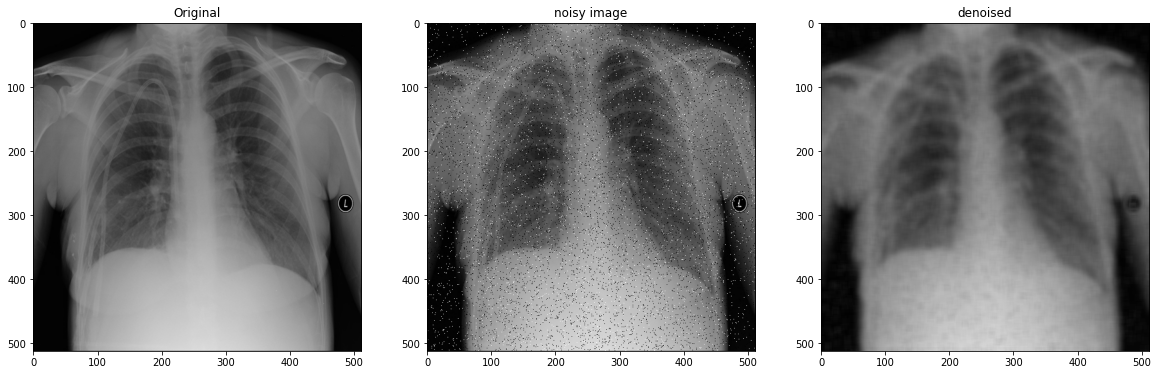

In [15]:
sigma_est = np.mean(estimate_sigma(noisy_img,multichannel=False))
img_nl = denoise_nl_means(noisy_img,sigma_est,h=2.15,patch_distance=5)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(img_nl,cmap="gray"),plt.title('denoised')
plt.show()

In [16]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, img_nl)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  19.370821652652314
PSNR of cleaned image =  31.677444191381802


# Total Variation

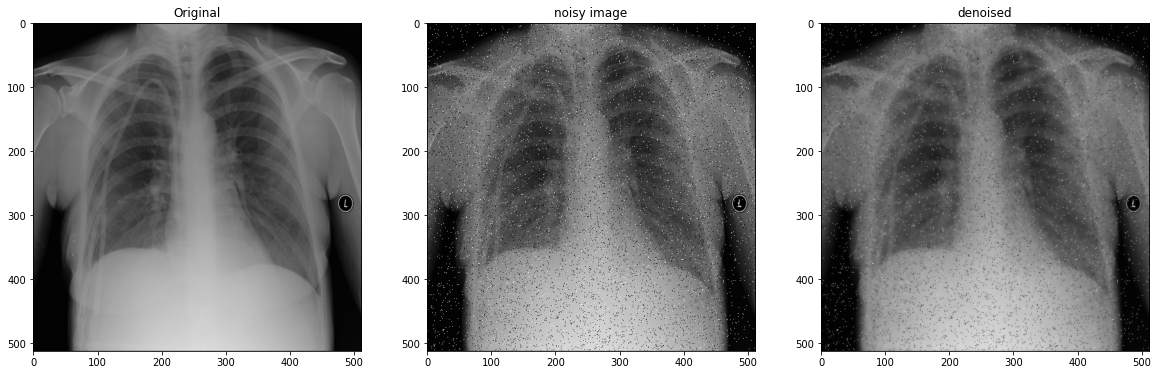

In [17]:
denoise_img_chambolle = denoise_tv_chambolle(noisy_img,weight=0.1,multichannel=False)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(denoise_img_chambolle,cmap="gray"),plt.title('denoised')
plt.show()

In [18]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoise_img_chambolle)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  19.370821652652314
PSNR of cleaned image =  25.177367260582656


# Bilateral Filter

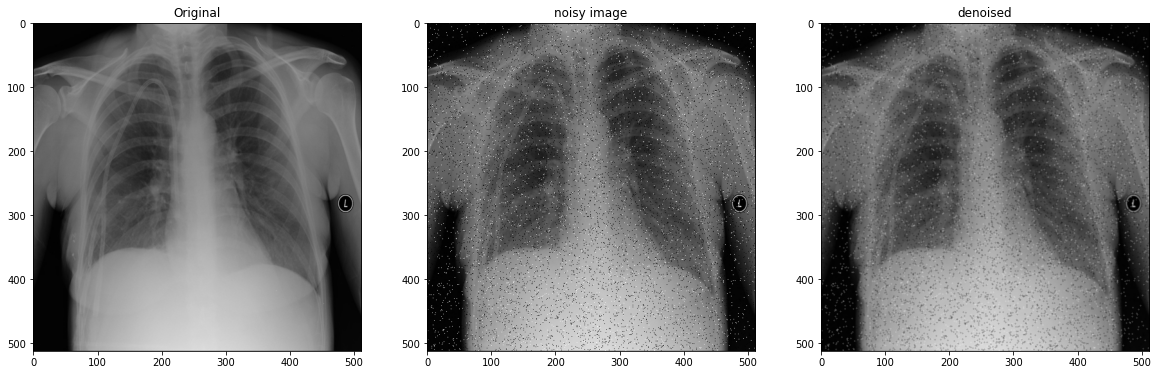

In [20]:
bilateral_blur = cv2.bilateralFilter(noisy_img,1,512,512)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(bilateral_blur,cmap="gray"),plt.title('denoised')
plt.show()

In [21]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, bilateral_blur)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  19.370821652652314
PSNR of cleaned image =  26.023679578702172
